In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

df = pd.read_csv("projectData/slang.csv", sep=',')
df

,Unnamed: 0,acronym,expansion
0,0,2day,today
1,1,2m2h,too much too handle
2,2,2moro,tomorrow
3,3,2nite,tonight
4,4,4eae,for ever and ever
...,...,...,...
3352,3352,yw,you are welcome
3353,3353,ywca,young womens christian association
3354,3354,ywimc,your wish is my command
3355,3355,ywsyls,you win some you lose some


In [2]:
#Hashtable that will be used inside the method. Creating it outside saves us from creating the hashTable each time the method is called
hashTable = dict(zip(df["acronym"], df["expansion"])) 

In [3]:
def acronyms(sentence: str) -> str: #Takes an input and output of a string
    wordList = str(sentence).split(" ") #splits string into a list seperated by spaces
    
    for word in range(len(wordList)):
        if wordList[word] in hashTable: #if the word is a key in the hashtable, convert it to the long english form
            wordList[word] = hashTable[wordList[word]]
            
    output = ' '.join(wordList) #Groups the list of word back into a single string
    return output

In [4]:
acronyms("Hello ywu") #test case

'Hello yo waz up'

In [5]:
#read dataset to be processed
import glob
csvFiles = glob.glob('datasetConcat/*.csv',recursive=True)


In [6]:
df2 = pd.DataFrame()
for file in csvFiles:
    try:
        df = pd.read_csv(file)
        if not df.empty:
            df2 = pd.concat([df2, df], ignore_index=True)
    except pd.errors.EmptyDataError:
        # Skip empty CSV files
        continue
df2

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOE3HBpptLU8Kfagdo9cV6yVLMhvLefG_2r6sxP...,Nikola Nikolov,https://play-lh.googleusercontent.com/-7UuZRRt...,Different and challenging game. Keeps interest...,4,0,1.0.8,2020-12-07 21:41:23,We're sorry to hear that you're having this pr...,2020-12-15 09:44:48
1,gp:AOqpTOEQRM1_8hWu7aH0wuzt31FOmCZiMmGYTPHRUDz...,Konichiyawa TV,https://play-lh.googleusercontent.com/a-/AOh14...,"It was awesome! from mechanics, atmosphere, so...",5,2,1.0.8,2020-11-23 02:07:51,Thanks so much for the awesome review. We appr...,2020-11-24 14:25:06
2,gp:AOqpTOH38-v1AXWkwAal2FDBbLlc0Z8d7XWD7JtHb9I...,Furry Petal,https://play-lh.googleusercontent.com/a-/AOh14...,Hopfully Me Buying This Game Increases The Cha...,5,0,1.0.6,2020-09-20 06:09:47,We are truly happy that you enjoyed our game. ...,2020-11-24 14:25:10
3,gp:AOqpTOFANKH-A7EfEO2qZJUYk899Ppi3HOHxXBpTl5o...,Jane Recalls1,https://play-lh.googleusercontent.com/a-/AOh14...,Love the Choose Your Own Adventure game play,5,0,1.0.2,2020-06-14 01:49:54,Thank you very much for your 5-star review!!!,2020-11-24 14:25:25
4,gp:AOqpTOF9T_NR0aVzuJXdVX565ppRc5QsbAJ0pVsoi8A...,Kyla AJ M,https://play-lh.googleusercontent.com/a-/AOh14...,"It's a fun game, with funny dialog and choices...",5,1,1.0.1,2020-03-21 15:51:39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
89766,gp:AOqpTOEmLKN61eg-Fsu7WCh8vNyP3A8WBLr4j9ZXQV2...,Mayur Dixit,https://play-lh.googleusercontent.com/a-/AOh14...,Amazing app...,5,9,3.2.5,2020-01-12 19:52:08,NaN,NaN
89767,gp:AOqpTOEJ9ilSSf2xjOtWFtw6EWM2Ct-8GvgvhIm2m_e...,Crystal McGrath,https://play-lh.googleusercontent.com/a-/AOh14...,Very helpful app. Cast video and music from An...,5,27,3.2.5,2020-01-12 05:59:18,NaN,NaN
89768,gp:AOqpTOErrbJo9iyxGzBOqxWxlVkyfHZMzCD7ngdpnDw...,Dennis Aktas,https://play-lh.googleusercontent.com/-m783Mux...,Gotta admit i was a little skeptical. But Cast...,4,20,3.2.4,2020-01-11 15:57:53,Thank you for downloading our app! We will kee...,2019-12-08 22:40:53
89769,gp:AOqpTOFu__1RJdWSuRRczu101XTeQloZd4Cvc1SVV9j...,Alessandro Lazzaro,https://play-lh.googleusercontent.com/a-/AOh14...,Simple app with elegant graphics! With each up...,5,9,1.8.2,2020-12-20 09:21:10,Thank you! It's nice to see my work appreciate...,2020-12-21 00:40:28


In [7]:
ts = []
#Helper function to record time spent by iteration, stored in ts

def replace():
    start = time.time()
    print(start)
    for index, row in df2.iterrows():
        acronyms(row['content'])
        end = time.time()
        ts.append(end - start)
        

1681248108.384


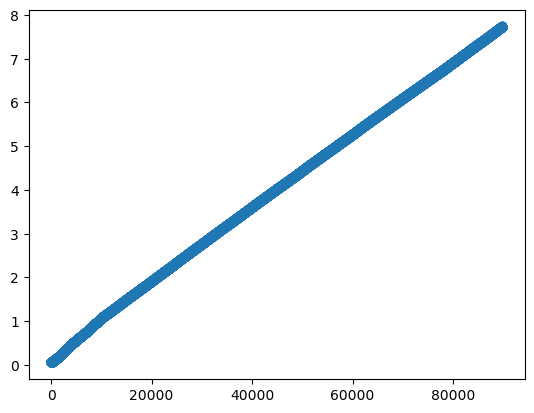

In [8]:
replace()
#Plot time complexcity

x = range(1, len(ts)+1)
plt.scatter(x, ts)